In [1]:
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from cdasws import CdasWs
import seaborn as sns
import pandas as pd
import numpy as np
import json

In [3]:
cdas = CdasWs()

In [74]:
#  Install these prerequisites once before executing the example code:
#  PyPI spacepy Option:
#    pip install -U spacepy cdasws
#  PyPI xarray Option:
#    pip install -U xarray cdflib cdasws
#  conda-forge xarray Option:
#    conda install conda-forge::xarray conda-forge::cdflib conda-forge::cdasws

cdas = CdasWs()
dataset = 'PSP_SWP_SPI_SF0A_L3_MOM'
# Edit the following var_names and example_interval 
# variables to suit your needs.
var_names = cdas.get_variable_names(dataset)
print('Variable names:', var_names)
example_interval = cdas.get_example_time_interval(dataset)
test = cdas.get_inventory(dataset)

Variable names: ['CNTS', 'QUALITY_FLAG', 'DENS', 'VEL_INST', 'VEL_SC', 'VEL_RTN_SUN', 'T_TENSOR_INST', 'TEMP', 'EFLUX_VS_ENERGY', 'EFLUX_VS_THETA', 'EFLUX_VS_PHI', 'SUN_DIST', 'VENUS_DIST', 'SC_VEL_RTN_SUN', 'QUAT_SC_TO_RTN', 'MAGF_SC', 'MAGF_INST']


In [3]:
var_tst = cdas.get_data(dataset, ["SUN_DIST", "MAGF_INST"], '2024-06-01T00:00:00.000Z', '2025-06-01T00:00:00.000Z')

In [13]:
var_tst[1].items()

dict_items([('MAGF_INST', VarCopy([[ -4.835127  ,   0.06272254,   0.08772666],
         [ -4.819806  ,   0.10649477,   0.12763357],
         [ -4.779998  ,   0.06620398,   0.05504112],
         ...,
         [ -8.313762  , -13.820949  ,  16.071377  ],
         [-10.392965  , -15.938023  ,  10.340557  ],
         [ -7.082968  , -15.502443  ,  14.063482  ]],
        shape=(1552820, 3), dtype=float32)), ('SUN_DIST', VarCopy([98664295.66906774, 98664238.83819415, 98664182.00717251, ...,
         86949758.8922461 , 86944548.48652622, 86939337.3328007 ],
        shape=(1552820,))), ('Epoch', VarCopy([datetime.datetime(2024, 6, 2, 23, 51, 48, 154439),
         datetime.datetime(2024, 6, 2, 23, 51, 51, 649680),
         datetime.datetime(2024, 6, 2, 23, 51, 55, 144920), ...,
         datetime.datetime(2025, 5, 30, 3, 19, 9, 426017),
         datetime.datetime(2025, 5, 30, 3, 22, 53, 122774),
         datetime.datetime(2025, 5, 30, 3, 26, 36, 819531)],
        shape=(1552820,), dtype=object)), 

In [28]:
df_space_data = pd.DataFrame.from_dict(var_tst[1].items())
df_space_data = df_space_data.set_index(0, drop=True).T
df_space_data["MAGF_INST"][1][0]

VarCopy([-4.835127  ,  0.06272254,  0.08772666], dtype=float32)

In [42]:
df_space_data["Epoch"][1]

VarCopy([datetime.datetime(2024, 6, 2, 23, 51, 48, 154439),
         datetime.datetime(2024, 6, 2, 23, 51, 51, 649680),
         datetime.datetime(2024, 6, 2, 23, 51, 55, 144920), ...,
         datetime.datetime(2025, 5, 30, 3, 19, 9, 426017),
         datetime.datetime(2025, 5, 30, 3, 22, 53, 122774),
         datetime.datetime(2025, 5, 30, 3, 26, 36, 819531)],
        shape=(1552820,), dtype=object)

In [44]:
df_space_data = pd.DataFrame.from_dict(var_tst[1].items())
df_space_data = df_space_data.set_index(0, drop=True).T
final_df = pd.DataFrame(columns=["MAGF_INST", "SUN_DIST", "Epoch"])
temp_df_col = pd.DataFrame(columns=["Low", "Mid", "High"], data=df_space_data["MAGF_INST"][1])

final_df["MAGF_INST"] = temp_df_col["Mid"]
final_df["SUN_DIST"] = df_space_data["SUN_DIST"][1]
final_df["Epoch"] = df_space_data["Epoch"][1]
final_df

,MAGF_INST,SUN_DIST,Epoch
0,0.062723,9.866430e+07,2024-06-02 23:51:48.154439
1,0.106495,9.866424e+07,2024-06-02 23:51:51.649680
2,0.066204,9.866418e+07,2024-06-02 23:51:55.144920
3,0.011693,9.866413e+07,2024-06-02 23:51:58.640161
4,0.240651,9.866407e+07,2024-06-02 23:52:02.135401
...,...,...,...
1552815,-13.018589,8.696018e+07,2025-05-30 03:11:42.032502
1552816,-12.613546,8.695497e+07,2025-05-30 03:15:25.729259
1552817,-13.820949,8.694976e+07,2025-05-30 03:19:09.426017
1552818,-15.938023,8.694455e+07,2025-05-30 03:22:53.122774


In [49]:
example_interval._end

datetime.datetime(2025, 7, 31, 23, 59, 49, tzinfo=datetime.timezone.utc)

In [4]:
groups = cdas.get_observatory_groups()
for i in groups:
    print(i)

{'Name': 'ACE', 'ObservatoryId': ['AC', 'ACE', 'OMNI (1AU IP Data)']}
{'Name': 'AIM', 'ObservatoryId': ['AIM CIPS PMC SCI']}
{'Name': 'AMPTE', 'ObservatoryId': ['AMPTE-CCE']}
{'Name': 'ARTEMIS', 'ObservatoryId': ['THB', 'THC']}
{'Name': 'AWE', 'ObservatoryId': ['AWE']}
{'Name': 'Alouette', 'ObservatoryId': ['Alouette-2']}
{'Name': 'Apollo', 'ObservatoryId': ['ALSEP']}
{'Name': 'Arase (ERG)', 'ObservatoryId': ['Arase(ERG)', 'ERG']}
{'Name': 'Balloons', 'ObservatoryId': ['PMC Turbo', 'bar_1A', 'bar_1B', 'bar_1C', 'bar_1D', 'bar_1G', 'bar_1H', 'bar_1I', 'bar_1J', 'bar_1K', 'bar_1M', 'bar_1N', 'bar_1O', 'bar_1Q', 'bar_1R', 'bar_1S', 'bar_1T', 'bar_1U', 'bar_1V', 'bar_2A', 'bar_2B', 'bar_2C', 'bar_2D', 'bar_2E', 'bar_2F', 'bar_2I', 'bar_2K', 'bar_2L', 'bar_2M', 'bar_2N', 'bar_2O', 'bar_2P', 'bar_2Q', 'bar_2T', 'bar_2W', 'bar_2X', 'bar_2Y', 'bar_3A', 'bar_3B', 'bar_3C', 'bar_3D', 'bar_3E', 'bar_3F', 'bar_3G', 'bar_4A', 'bar_4B', 'bar_4C', 'bar_4D', 'bar_4E', 'bar_4F', 'bar_4G', 'bar_4H', 'ba

In [5]:
look_df = pd.DataFrame.from_dict(groups)
look_df


,Name,ObservatoryId
0,ACE,"[AC, ACE, OMNI (1AU IP Data)]"
1,AIM,[AIM CIPS PMC SCI]
2,AMPTE,[AMPTE-CCE]
3,ARTEMIS,"[THB, THC]"
4,AWE,[AWE]
...,...,...
63,TWINS,"[TWINS-, TWINS1, TWINS2]"
64,Ulysses,"[ULYSSES, Ulysses]"
65,Van Allen Probes (RBSP),"[RBSP, RBSP-A, RBSP-A-RBSPICE, RBSP-B, RBSP-B-..."
66,Voyager,"[VG1, VG2, VGR-1, VGR-2, VOYAGER1, VOYAGER2, V..."


In [6]:
look_df["Name"].unique()

array(['ACE', 'AIM', 'AMPTE', 'ARTEMIS', 'AWE', 'Alouette', 'Apollo',
       'Arase (ERG)', 'Balloons', 'BioSentinel', 'CNOFS', 'CRRES',
       'Cassini', 'Cluster', 'DMSP', 'DSCOVR', 'Dynamics Explorer',
       'Equator-S', 'FAST', 'Formosat', 'GOES', 'GOLD', 'GPS', 'Genesis',
       'Geosynchronous Investigations', 'Geotail',
       'Ground-Based Investigations', 'Hawkeye', 'Helio Ephemeris',
       'Helios', 'IBEX', 'ICON', 'IMAGE', 'IMP (All)', 'ISEE', 'ISIS',
       'ISS', 'Interball', 'LANL', 'MAVEN', 'MESSENGER', 'MMS', 'Mariner',
       'Mars Global Surveyor (MGS)', 'Mars Science Laboratory (MSL)',
       'NOAA', 'New Horizons',
       'OMNI (Combined 1AU IP Data; Magnetic and Solar Indices)',
       'POES/MetOp', 'Parker Solar Probe (PSP)', 'Pioneer', 'Polar',
       'REACH', 'SAMPEX', 'SOHO', 'ST5', 'STEREO', 'Smallsats/Cubesats',
       'Solar Orbiter', 'Sounding Rockets', 'THEMIS', 'TIMED', 'TSS-1R',
       'TWINS', 'Ulysses', 'Van Allen Probes (RBSP)', 'Voyager', 'Wind'],


In [7]:
look_df[look_df["Name"] == "Voyager"]

,Name,ObservatoryId
66,Voyager,"[VG1, VG2, VGR-1, VGR-2, VOYAGER1, VOYAGER2, V..."


In [ ]:
look_df[look_df["Name"] == "Voyager"]["ObservatoryId"].values

array([list(['VG1', 'VG2', 'VGR-1', 'VGR-2', 'VOYAGER1', 'VOYAGER2', 'Voyager 1', 'Voyager 2', 'Voyager1', 'Voyager2'])],
      dtype=object)

In [31]:
voyeger_1_info = cdas.get_datasets(observatoryGroups=["Voyager"], instrumentTypes=['Voyager 1'])
voyeger_dataset_info = pd.DataFrame.from_dict(voyeger_1_info)
temp_time = voyeger_dataset_info["TimeInterval"].apply(pd.Series)
voyeger_dataset_info = pd.concat([voyeger_dataset_info, temp_time], axis=1)
voyeger_dataset_info["Start"] = pd.to_datetime(voyeger_dataset_info["Start"])
voyeger_dataset_info["End"] = pd.to_datetime(voyeger_dataset_info["End"])
voyeger_dataset_info[voyeger_dataset_info["End"].dt.year == 2025].head()

,Id,Observatory,Instrument,ObservatoryGroup,InstrumentType,Label,TimeInterval,PiName,PiAffiliation,Notes,DatasetLink,Doi,SpaseResourceId,AdditionalMetadata,Start,End
2,AC_AT_DEF,[AC],[DEF],[ACE],"[Ephemeris/Attitude/Ancillary, Particles (spac...","ACE Hourly RTN, GSE and J2000 GCI Attitude dir...","{'Start': '1997-08-26T00:00:00.000Z', 'End': '...",E. C. Stone,California Institute of Technology,https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#...,"[{'Title': 'The ACE Science Center website', ...",10.48322/f2a8-nm36,spase://NASA/NumericalData/ACE/Attitude/Defini...,"[{'Type': 'SPASE', 'value': 'https://heliophys...",1997-08-26 00:00:00+00:00,2025-12-08 12:00:00+00:00
3,AC_H0_MFI,[AC],[MAG],[ACE],[Magnetic Fields (space)],H0 - ACE Magnetic Field 16-Second Level 2 Data...,"{'Start': '1997-09-02T00:00:12.000Z', 'End': '...",N. Ness,Bartol Research Institute,https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#...,[{'Title': 'the ACE Science Center Level 2 Dat...,10.48322/e0dc-0h53,spase://NASA/NumericalData/ACE/MAG/L2/PT16S,"[{'Type': 'SPASE', 'value': 'https://heliophys...",1997-09-02 00:00:12+00:00,2025-11-07 23:59:44+00:00
5,AC_H1_EPM,[AC],[EPAM],[ACE],[Particles (space)],ACE/EPAM Solar Energetic Particle 5-Minute Lev...,"{'Start': '1997-08-30T17:01:00.000Z', 'End': '...",R. Gold,JHU/APL,https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#...,[{'Title': 'the ACE Science Center Level 2 Dat...,10.48322/w4wv-rj18,spase://NASA/NumericalData/ACE/EPAM/L2/PT5M,"[{'Type': 'SPASE', 'value': 'https://heliophys...",1997-08-30 17:01:00+00:00,2025-09-18 23:54:00+00:00
6,AC_H1_MFI,[AC],[MAG],[ACE],[Magnetic Fields (space)],H1 - ACE Magnetic Field 4-Minute Level 2 Data ...,"{'Start': '1997-09-02T00:00:00.000Z', 'End': '...",N. Ness,Bartol Research Institute,https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#...,[{'Title': 'the ACE Science Center Level 2 Dat...,10.48322/brf1-g493,spase://NASA/NumericalData/ACE/MAG/L2/PT4M,"[{'Type': 'SPASE', 'value': 'https://heliophys...",1997-09-02 00:00:00+00:00,2025-11-07 23:56:00+00:00
7,AC_H1_SIS,[AC],[SIS],[ACE],[Particles (space)],ACE/SIS Solar Isotope Spectrometer 256-sec Lev...,"{'Start': '1997-08-29T00:00:26.000Z', 'End': '...",E. C. Stone,California Institute of Technology,https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#...,[{'Title': 'The ACE Science Center Level 2 Da...,10.48322/9kmb-8280,spase://NASA/NumericalData/ACE/SIS/L2/PT256S,"[{'Type': 'SPASE', 'value': 'https://heliophys...",1997-08-29 00:00:26+00:00,2025-11-07 23:59:58+00:00


In [33]:
voyeger_dataset_info[voyeger_dataset_info["End"].dt.year == 2025]["Label"].unique()

array(['ACE Hourly RTN, GSE and J2000 GCI Attitude direction cosines - E. C. Stone (California Institute of Technology)',
       'H0 - ACE Magnetic Field 16-Second Level 2 Data - N. Ness (Bartol Research Institute)',
       'ACE/EPAM Solar Energetic Particle 5-Minute Level 2 Data - R. Gold (JHU/APL)',
       'H1 - ACE Magnetic Field 4-Minute Level 2 Data - N. Ness (Bartol Research Institute)',
       'ACE/SIS Solar Isotope Spectrometer 256-sec Level 2 Data - E. C. Stone (California Institute of Technology)',
       'ACE/CRIS Cosmic Ray Isotope Spectrometer 1-Hour Level 2 Data - E. C. Stone (California Institute of Technology)',
       'ACE/EPAM Solar Energetic Particle 1-Hour Level 2 Data - R. Gold (JHU/APL)',
       'H2 - ACE Magnetic Field 1-Hour Level 2 Data - N. Ness (Bartol Research Institute)',
       'ACE/SIS Solar Isotope Spectrometer 1-Hour Level 2 Data - E. C. Stone (California Institute of Technology)',
       'ACE/ULEIS Solar Suprathermal and Energetic Particle Intensities 

In [72]:
voyeger_dataset_info[(voyeger_dataset_info["End"].dt.year >= 2025) & (voyeger_dataset_info["Label"] == "Position in heliocentric coordinates from SPDF Helioweb - Natalia Papitashvili (NASA/GSFC/SPDF)")]

,Id,Observatory,Instrument,ObservatoryGroup,InstrumentType,Label,TimeInterval,PiName,PiAffiliation,Notes,DatasetLink,Doi,SpaseResourceId,AdditionalMetadata,Start,End
439,BEPICOLOMBO_HELIO1DAY_POSITION,[BEPICOLOMBO],[position],[Helio Ephemeris],[Ephemeris/Attitude/Ancillary],Position in heliocentric coordinates from SPDF...,"{'Start': '2018-10-21T00:00:00.000Z', 'End': '...",Natalia Papitashvili,NASA/GSFC/SPDF,https://cdaweb.gsfc.nasa.gov/misc/NotesB.html#...,"[{'Title': 'Documentation', 'Text': 'Heliocent...",10.48322/cyec-7n35,spase://NASA/NumericalData/BepiColombo/HelioWe...,"[{'Type': 'SPASE', 'value': 'https://heliophys...",2018-10-21 00:00:00+00:00,2027-03-13 00:00:00+00:00
440,BEPICOLOMBO_HELIO1HR_POSITION,[BEPICOLOMBO],[position],[Helio Ephemeris],[Ephemeris/Attitude/Ancillary],Position in heliocentric coordinates from SPDF...,"{'Start': '2018-10-21T00:00:00.000Z', 'End': '...",Natalia Papitashvili,NASA/GSFC/SPDF,https://cdaweb.gsfc.nasa.gov/misc/NotesB.html#...,"[{'Title': 'Documentation', 'Text': 'Heliocent...",NaN,NaN,"[{'Type': 'SPDF_SKT_CDF', 'value': 'https://cd...",2018-10-21 00:00:00+00:00,2027-03-13 23:00:00+00:00
443,BORRELLY_HELIO1HR_POSITION,[BORRELLY],[position],[Helio Ephemeris],[Ephemeris/Attitude/Ancillary],Position in heliocentric coordinates from SPDF...,"{'Start': '1996-01-01T00:00:00.000Z', 'End': '...",Natalia Papitashvili,NASA/GSFC/SPDF,https://cdaweb.gsfc.nasa.gov/misc/NotesB.html#...,"[{'Title': 'Documentation', 'Text': 'Heliocent...",NaN,NaN,"[{'Type': 'SPDF_SKT_CDF', 'value': 'https://cd...",1996-01-01 00:00:00+00:00,2030-12-31 23:00:00+00:00
720,COMETGS_HELIO1HR_POSITION,[COMETGS],[position],[Helio Ephemeris],[Ephemeris/Attitude/Ancillary],Position in heliocentric coordinates from SPDF...,"{'Start': '1996-01-01T00:00:00.000Z', 'End': '...",Natalia Papitashvili,NASA/GSFC/SPDF,https://cdaweb.gsfc.nasa.gov/misc/NotesC.html#...,"[{'Title': 'Documentation', 'Text': 'Heliocent...",NaN,NaN,"[{'Type': 'SPDF_SKT_CDF', 'value': 'https://cd...",1996-01-01 00:00:00+00:00,2030-12-31 23:00:00+00:00
722,COMETHMP_HELIO1HR_POSITION,[COMETHMP],[position],[Helio Ephemeris],[Ephemeris/Attitude/Ancillary],Position in heliocentric coordinates from SPDF...,"{'Start': '1996-01-01T00:00:00.000Z', 'End': '...",Natalia Papitashvili,NASA/GSFC/SPDF,https://cdaweb.gsfc.nasa.gov/misc/NotesC.html#...,"[{'Title': 'Documentation', 'Text': 'Heliocent...",NaN,NaN,"[{'Type': 'SPDF_SKT_CDF', 'value': 'https://cd...",1996-01-01 00:00:00+00:00,2030-12-31 23:00:00+00:00
728,DAWN_HELIO1HR_POSITION,[DAWN],[position],[Helio Ephemeris],[Ephemeris/Attitude/Ancillary],Position in heliocentric coordinates from SPDF...,"{'Start': '2007-09-28T00:00:00.000Z', 'End': '...",Natalia Papitashvili,NASA/GSFC/SPDF,https://cdaweb.gsfc.nasa.gov/misc/NotesD.html#...,"[{'Title': 'Documentation', 'Text': 'Heliocent...",NaN,NaN,"[{'Type': 'SPDF_SKT_CDF', 'value': 'https://cd...",2007-09-28 00:00:00+00:00,2043-10-29 23:00:00+00:00
809,EARTH_HELIO1DAY_POSITION,[EARTH],[position],[Helio Ephemeris],[Ephemeris/Attitude/Ancillary],Position in heliocentric coordinates from SPDF...,"{'Start': '1965-01-01T00:00:00.000Z', 'End': '...",Natalia Papitashvili,NASA/GSFC/SPDF,https://cdaweb.gsfc.nasa.gov/misc/NotesE.html#...,"[{'Title': 'Documentation', 'Text': 'Heliocent...",NaN,spase://NASA/NumericalData/Planet/Earth/HelioW...,"[{'Type': 'SPASE', 'value': 'https://heliophys...",1965-01-01 00:00:00+00:00,2030-12-31 00:00:00+00:00
810,EARTH_HELIO1HR_POSITION,[EARTH],[position],[Helio Ephemeris],[Ephemeris/Attitude/Ancillary],Position in heliocentric coordinates from SPDF...,"{'Start': '1965-01-01T00:00:00.000Z', 'End': '...",Natalia Papitashvili,NASA/GSFC/SPDF,https://cdaweb.gsfc.nasa.gov/misc/NotesE.html#...,"[{'Title': 'Documentation', 'Text': 'Heliocent...",NaN,NaN,"[{'Type': 'SPDF_SKT_CDF', 'value': 'https://cd...",1965-01-01 00:00:00+00:00,2035-12-31 23:00:00+00:00
909,GIACOBINI_HELIO1HR_POSITION,[GIACOBINI],[position],[Helio Ephemeris],[Ephemeris/Attitude/Ancillary]

In [78]:
all_dataset = pd.DataFrame.from_dict(dataset)
all_dataset[all_dataset["Id"] == "MARS_HELIO1DAY_POSITION"]["TimeInterval"].values

array([{'Start': '1965-01-01T00:00:00.000Z', 'End': '2030-12-31T00:00:00.000Z'}],
      dtype=object)

In [79]:
all_dataset[all_dataset["Id"] == "MARS_HELIO1DAY_POSITION"]

,Id,Observatory,Instrument,ObservatoryGroup,InstrumentType,Label,TimeInterval,PiName,PiAffiliation,Notes,DatasetLink,Doi,SpaseResourceId,AdditionalMetadata
1347,MARS_HELIO1DAY_POSITION,[MARS],[position],[Helio Ephemeris],[Ephemeris/Attitude/Ancillary],Position in heliocentric coordinates from SPDF...,"{'Start': '1965-01-01T00:00:00.000Z', 'End': '...",Natalia Papitashvili,NASA/GSFC/SPDF,https://cdaweb.gsfc.nasa.gov/misc/NotesM.html#...,"[{'Title': 'Documentation', 'Text': 'Heliocent...",NaN,spase://NASA/NumericalData/Planet/Mars/HelioWe...,"[{'Type': 'SPASE', 'value': 'https://heliophys..."


In [80]:
dataset = cdas.get_datasets(observatoryGroups=["MARS_HELIO1DAY_POSITION"], instrumentTypes=['position'])
dataset[-1]

{'Id': 'WI_WA_RAD1_L3_DF',
 'Observatory': ['WI'],
 'Instrument': ['WA_RAD1'],
 'ObservatoryGroup': ['Wind'],
 'InstrumentType': ['Radio and Plasma Waves (space)'],
 'Label': 'Wind Waves, Level 3 Direction-Finding (DF) parameters - K. Issautier (LESIA, Observatoire de Paris-PSL, CNRS)',
 'TimeInterval': {'Start': '1994-11-10T16:38:07.000Z',
  'End': '2025-12-09T23:58:41.000Z'},
 'PiName': 'K. Issautier',
 'PiAffiliation': 'LESIA, Observatoire de Paris-PSL, CNRS',
 'Notes': 'https://cdaweb.gsfc.nasa.gov/misc/NotesW.html#WI_WA_RAD1_L3_DF',
 'DatasetLink': [{'Title': 'repository',
   'Text': 'CDPP archive ',
   'Url': 'https://cdpp.irap.omp.eu/'}],
 'AdditionalMetadata': [{'Type': 'SPDF_SKT_CDF',
   'value': 'https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0JSONS/wi_wa_rad1_l3_df_00000000_v01.json'}]}

In [84]:
all_dataset = pd.DataFrame.from_dict(dataset)
all_dataset[all_dataset["Id"] == "MARS_HELIO1DAY_POSITION"]["TimeInterval"].values

array([{'Start': '1965-01-01T00:00:00.000Z', 'End': '2030-12-31T00:00:00.000Z'}],
      dtype=object)

In [85]:
status, full_data = cdas.get_data("MARS_HELIO1DAY_POSITION", ['RAD_AU'], time0="2024-01-01T04:04:15.000Z", time1="2025-12-08T23:59:49.000Z")
full_data

{'Epoch': VarCopy([datetime.datetime(2024, 1, 2, 0, 0),
          datetime.datetime(2024, 1, 3, 0, 0),
          datetime.datetime(2024, 1, 4, 0, 0),
          datetime.datetime(2024, 1, 5, 0, 0),
          datetime.datetime(2024, 1, 6, 0, 0),
          datetime.datetime(2024, 1, 7, 0, 0),
          datetime.datetime(2024, 1, 8, 0, 0),
          datetime.datetime(2024, 1, 9, 0, 0),
          datetime.datetime(2024, 1, 10, 0, 0),
          datetime.datetime(2024, 1, 11, 0, 0),
          datetime.datetime(2024, 1, 12, 0, 0),
          datetime.datetime(2024, 1, 13, 0, 0),
          datetime.datetime(2024, 1, 14, 0, 0),
          datetime.datetime(2024, 1, 15, 0, 0),
          datetime.datetime(2024, 1, 16, 0, 0),
          datetime.datetime(2024, 1, 17, 0, 0),
          datetime.datetime(2024, 1, 18, 0, 0),
          datetime.datetime(2024, 1, 19, 0, 0),
          datetime.datetime(2024, 1, 20, 0, 0),
          datetime.datetime(2024, 1, 21, 0, 0),
          datetime.datetime(2024, 1, 22

In [101]:
print('Example time interval:', example_interval)
status, data = cdas.get_data("PSP_SWP_SPI_SF0A_L3_MOM", ["SUN_DIST", "MAGF_INST", "SC_VEL_RTN_SUN"], "2025-01-01T04:04:15.000Z", "2025-12-08T23:59:49.000Z")

if 'spacepy' in str(type(data)):
    #  see https://spacepy.github.io/datamodel.html
    print(var_names[0], '=', data[var_names[0]])
    print(data[var_names[0]].attrs)
else:
    #  see https://github.com/MAVENSDC/cdflib
    print(var_names[0], '=', data.data_vars[var_names[0]].values)
    print(data.data_vars[var_names[0]].attrs)

print(data)
# ...

Example time interval: 2025-07-31T21:59:49+00:00 2025-07-31T23:59:49+00:00


KeyError: 'CNTS'

In [102]:
a = data["Epoch"][0]
a.minute

5

In [103]:
df = pd.DataFrame(columns=["TIME","SUN_DIST", "SC_VEL_RTN_SUN"])
df["TIME"]=data['Epoch']
df['SUN_DIST']=data["SUN_DIST"]
df["SC_VEL_RTN_SUN"]=data["SC_VEL_RTN_SUN"]
df["hour"]=df["TIME"].apply(lambda x: x.hour)
df["minutes"]=df["TIME"].apply(lambda x: x.minute)
df["seconds"]=df["TIME"].apply(lambda x: x.second)
df

,TIME,SUN_DIST,SC_VEL_RTN_SUN,hour,minutes,seconds
0,2025-01-01 04:05:18.226924,5.024897e+07,48.164791,4,5,18
1,2025-01-01 04:09:01.923441,5.025975e+07,48.156058,4,9,1
2,2025-01-01 04:12:45.620038,5.027052e+07,48.147327,4,12,45
3,2025-01-01 04:16:29.316635,5.028129e+07,48.138600,4,16,29
4,2025-01-01 04:20:13.013212,5.029205e+07,48.129875,4,20,13
...,...,...,...,...,...,...
1103310,2025-07-31 23:44:54.310881,1.092790e+08,1.379031,23,44,54
1103311,2025-07-31 23:48:38.007638,1.092793e+08,1.376839,23,48,38
1103312,2025-07-31 23:52:21.704335,1.092796e+08,1.374647,23,52,21
1103313,2025-07-31 23:56:05.401072,1.092799e+08,1.372454,23,56,5


In [61]:
timedict = {"hour":[], "minutes":[], "seconds":[]}
for hour in range (22,23):
    for minute in range (0,60):
        for second in range (0,60):
            timedict["hour"].append(hour)
            timedict["minutes"].append(minute)
            timedict["seconds"].append(second)
time_df = pd.DataFrame.from_dict(timedict)
time_df["day"] = "31"
time_df["month"] = "07"
time_df["year"] = "2025"
time_df["TIME"] = pd.to_datetime(time_df)
time_df.drop(["hour", "minutes", "seconds", "day", "month", "year"], axis=1, inplace=True)
time_df

,TIME
0,2025-07-31 22:00:00
1,2025-07-31 22:00:01
2,2025-07-31 22:00:02
3,2025-07-31 22:00:03
4,2025-07-31 22:00:04
...,...
3595,2025-07-31 22:59:55
3596,2025-07-31 22:59:56
3597,2025-07-31 22:59:57
3598,2025-07-31 22:59:58


In [62]:
df["TIME"] = pd.to_datetime(df["TIME"]).dt.floor('s')
df

,TIME,SUN_DIST,SC_VEL_RTN_SUN,hour,minutes,seconds
0,2025-07-31 22:00:30,1.092701e+08,1.440415,22,0,30
1,2025-07-31 22:04:14,1.092705e+08,1.438223,22,4,14
2,2025-07-31 22:07:58,1.092708e+08,1.436030,22,7,58
3,2025-07-31 22:11:41,1.092711e+08,1.433838,22,11,41
4,2025-07-31 22:15:25,1.092714e+08,1.431645,22,15,25
5,2025-07-31 22:19:09,1.092717e+08,1.429453,22,19,9
6,2025-07-31 22:22:52,1.092721e+08,1.427261,22,22,52
7,2025-07-31 22:26:36,1.092724e+08,1.425068,22,26,36
8,2025-07-31 22:30:20,1.092727e+08,1.422876,22,30,20
9,2025-07-31 22:34:04,1.092730e+08,1.420683,22,34,4


In [63]:
Time_Series_All = time_df.set_index("TIME").join(df.set_index("TIME"))
Time_Series_All.drop(["hour", "minutes", "seconds"], axis=1, inplace=True)
Time_Series_All.reset_index(inplace=True)
Time_Series_All

,TIME,SUN_DIST,SC_VEL_RTN_SUN
0,2025-07-31 22:00:00,NaN,NaN
1,2025-07-31 22:00:01,NaN,NaN
2,2025-07-31 22:00:02,NaN,NaN
3,2025-07-31 22:00:03,NaN,NaN
4,2025-07-31 22:00:04,NaN,NaN
...,...,...,...
3595,2025-07-31 22:59:55,NaN,NaN
3596,2025-07-31 22:59:56,NaN,NaN
3597,2025-07-31 22:59:57,NaN,NaN
3598,2025-07-31 22:59:58,NaN,NaN


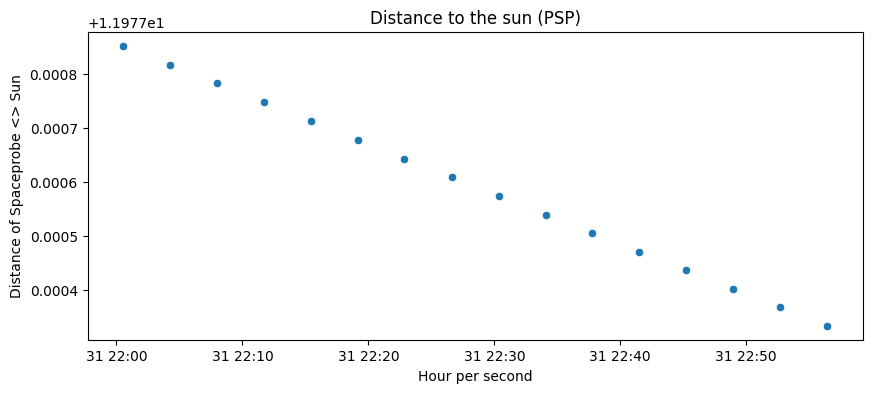

In [64]:
fig = plt.subplots(figsize=(10, 4))
ax = sns.scatterplot(data=Time_Series_All, x="TIME", y="SUN_DIST")
ax.set(xlabel = "Hour per second", ylabel = "Distance of Spaceprobe <> Sun", title="Distance to the sun (PSP)")
#plotTest.set(ylim=(4470.08,4470.1))
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

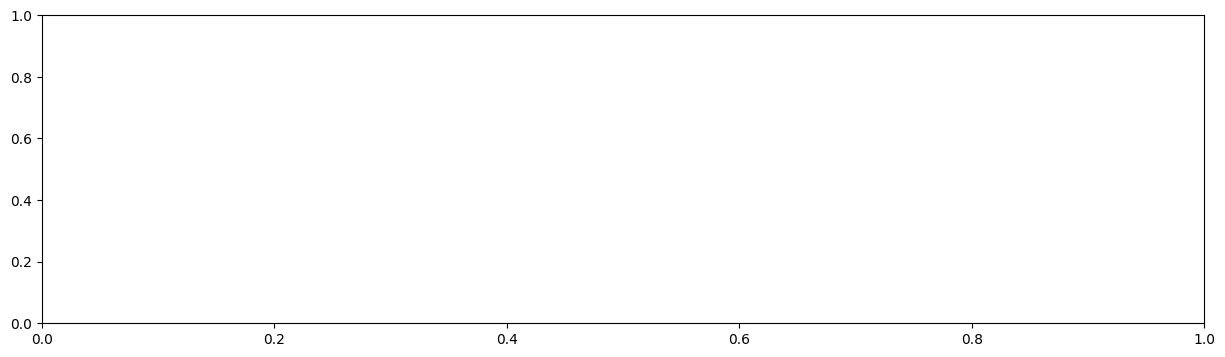

In [65]:
fig = plt.subplots(figsize=(15, 4))
sns.lineplot(data=df_space_data[(df_space_data["Epoch"].dt.month == 7) & (df_space_data["Epoch"].dt.year == 2025)], x="Epoch", y="SUN_DIST")
#plotTest.set(ylim=(4470.08,4470.1))
plt.show()

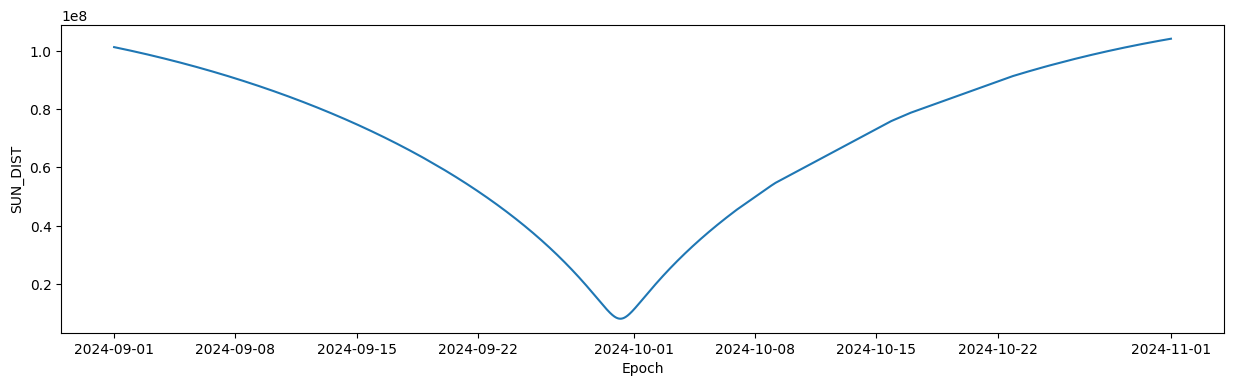

In [48]:
fig = plt.subplots(figsize=(15, 4))
sns.lineplot(data=df_space_data[((df_space_data["Epoch"].dt.month == 10) | (df_space_data["Epoch"].dt.month == 9)) & (df_space_data["Epoch"].dt.year == 2024)], x="Epoch", y="SUN_DIST")
#plotTest.set(ylim=(4470.08,4470.1))
plt.show()

# Clean code
---

In [ ]:
curr_date = datetime.now()
curr_date = curr_date - timedelta(days=1)
with open('lastUpdate.json', 'r', encoding='utf-8') as f:
    last_update = json.load(f)

In [ ]:
print(f"Time interval 2025-01-01 - {curr_date.date()}")
status, data = cdas.get_data("PSP_SWP_SPI_SF0A_L3_MOM", ["SUN_DIST", "MAGF_INST", "SC_VEL_RTN_SUN"], "2025-01-01T04:04:15.000Z", f"{curr_date.year}-{curr_date.month}-{curr_date.day}T00:00:00.000Z")

In [129]:
df = pd.DataFrame(columns=["TIME","SUN_DIST", "SC_VEL_RTN_SUN", "MAGF_INST"])
df["TIME"]=pd.to_datetime(data['Epoch'])
df['SUN_DIST']=data["SUN_DIST"]
df["MAGF_INST"]=data["MAGF_INST"]
df["SC_VEL_RTN_SUN"]=data["SC_VEL_RTN_SUN"]
df["hour"]=df["TIME"].apply(lambda x: x.hour)
df["minutes"]=df["TIME"].apply(lambda x: x.minute)
df["seconds"]=df["TIME"].apply(lambda x: x.second)
df.tail()

,TIME,SUN_DIST,SC_VEL_RTN_SUN,MAGF_INST,hour,minutes,seconds
1103310,2025-07-31 23:44:54.310881,1.092790e+08,1.379031,10.537175,23,44,54
1103311,2025-07-31 23:48:38.007638,1.092793e+08,1.376839,9.007251,23,48,38
1103312,2025-07-31 23:52:21.704335,1.092796e+08,1.374647,8.424750,23,52,21
1103313,2025-07-31 23:56:05.401072,1.092799e+08,1.372454,9.883977,23,56,5
1103314,2025-07-31 23:59:49.097769,1.092802e+08,1.370262,3.500915,23,59,49


In [ ]:
last_date = df["TIME"][len(df["TIME"])-1].date()
data_info = {"last_update": f"{last_date.year}-{last_date.month}-{last_date.day}"}
if(pd.to_datetime(last_update["last_update"]).date() == last_date):
    print("Same")
with open('lastUpdate.json', 'w', encoding='utf-8') as f:
    json.dump(data_info, f, ensure_ascii=False, indent=4)

In [ ]:
import requests
requests.post('https://ntfy.sh/PSP_SWP_SPI_SF0A_L3_MOM', 'Hello, world!')

<Response [200]>